# Project: Analysis of No-show appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected the No-show appointment project of Brazilian patients, since this question was interesting and has also a practical relevance. The findings could be used not only in Brazil, but also countries with similar behaviours to improve the show up ratio of patients to doctor's appointments.
>
> Based on that I have selected two questions to explore furhter in this project:
>
> Research Question 1: **Has the SMS reminder an impact on the patient to show up to a doctors appointment?**
>
> Research Question 2 : **What impact on showing up to a doctors appointment has the waiting time?**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> Gaining a first understanding of the data to determain the next steps in data cleaning and analysis to perform.

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### Show header for a first glance:

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

**Result**: Delete AppointmentID, since it is a unique value that is independed from the no-show event. Convert entry for No-show result to correct understanding.

#### Show shape of the data set:

In [5]:
df.shape

(110527, 14)

#### Show data types and possible missing values:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Results**: No missing values. PatientId formatted as float. Date colums formatted as string.

#### Show unique values:

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**Result**: AppointmentID has the same number of entries as number of rows. -> No value add for data analysis.

#### Show first summary statistics:

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Results**: Mean age: 37 years with a min age of -1 and max age of 115. On average 9.8% of patients have a scholarship. On average 19.7% of patients have hipertension, 7.2% diabetis, 3.0% alcoholism and 2.2% handcap. On averate 32.1% of patients received a SMS. Remove line with age of -1.

#### Check on duplicates:

In [9]:
sum(df.duplicated())

0

**Result**: No duplicates.

Show a first histogram to see the data distribution:

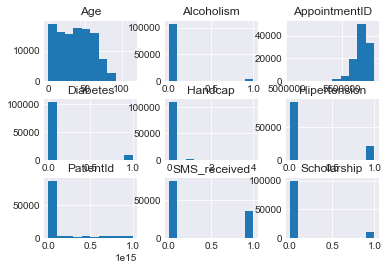

In [10]:
df.hist();

**Result**: Scatter plots give no extra information, since the values for the most variables are digital (0 ir 1).

### Data Cleaning (Preparation of the data for the analysis step)

#### Delete AppointmentID:

In [11]:
df_base = df.drop(['AppointmentID'], axis = 1)

Test result:

In [12]:
df_base.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Result**: AppointmentID deleted.

#### Convert data types:

In [13]:
df_base['PatientId'] = df_base['PatientId'].astype(int)

In [14]:
df_base['ScheduledDay'] = pd.to_datetime(df_base['ScheduledDay'])

In [15]:
df_base['AppointmentDay'] = pd.to_datetime(df_base['AppointmentDay'])

Check result:

In [16]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(8), object(3)
memory usage: 11.0+ MB


**Result**: Data types converted.

Delete lines with age < 0:

In [17]:
no_age = df[df_base['Age'] < 0].index
df_base.drop(no_age, inplace = True)

Check result:

In [18]:
sum(df_base['Age'] < 0)

0

**Result**: Lines with age < 0 deleted.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Has the SMS reminder an impact on the patient to show up to a doctors appointment?

Calculating the No-show percentage:

In [19]:
patient_counts = df_base['PatientId'].count()
patient_counts

110526

In [20]:
show_counts_init = df_base['No-show'].value_counts()
show_counts_init

No     88207
Yes    22319
Name: No-show, dtype: int64

In [21]:
no_show_counts_init = show_counts_init['Yes']
no_show_counts_init

22319

In [22]:
ratio_no_show = no_show_counts_init / patient_counts
ratio_no_show

0.20193438647919945

**Result**: 20.2% of patients don't show up on appointments.

#### Visualization of no-show patients for appointments:

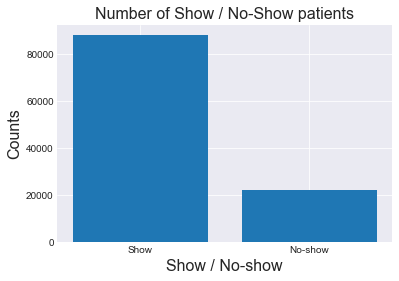

In [23]:
locations = [1, 2]
heights = df_base['No-show'].value_counts()
labels = ['Show', 'No-show']

plt.bar(locations, heights, tick_label = labels)

plt.title('Number of Show / No-Show patients', fontsize = 16)
plt.xlabel('Show / No-show', fontsize = 16)
plt.ylabel('Counts', fontsize = 16);

**Result**: 20.2% or 22319 patients don't show up to a doctor's appointment

Text(0.5, 1.0, 'Percent of Show / No-Show patients')

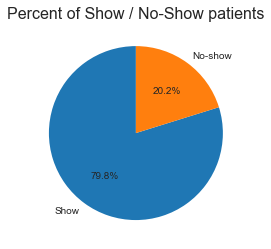

In [24]:
viz = df_base['No-show'].value_counts()
labels = 'Show', 'No-show'
plt.pie(viz, labels=labels, autopct='%1.1f%%', startangle=90);
plt.title('Percent of Show / No-Show patients', fontsize = 16)

Alternative visualization of show and no-show patients.

**Following now visualization using matplotlib:**

Function code for repetitive visualizations:

In [25]:
def viz(title, fonts, x_axis, y_axis, bar_lable, group, counter, group1, group2, label1, label2):
    counts = df_base.groupby([ group, x_axis]).count()[counter]
    totals = df_base.groupby([group]).count()[counter]

    show_prop = counts[group1] / totals[group1] * 100
    no_show_prop = counts[group2] / totals[group2] * 100
    
    ind = np.arange(len(show_prop))
    
    show_bar = plt.bar(ind, show_prop, label = label1, alpha = alphas)
    no_show_bar = plt.bar(ind, no_show_prop, label = label2 , alpha = alphas)
    
    plt.title(title, fontsize = fonts)
    plt.xlabel(x_axis, fontsize = fonts)
    plt.ylabel(y_axis, fontsize = fonts)
    locations = ind
    labels = bar_lable
    plt.xticks(locations, labels)
    plt.legend();

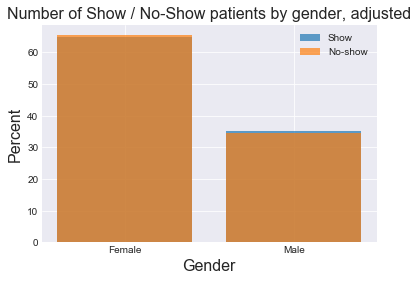

In [26]:
fonts = 16
alphas = .7
title = 'Number of Show / No-Show patients by gender, adjusted'
x_axis = 'Gender'
y_axis = 'Percent'
bar_lable = ['Female', 'Male']
group = 'No-show'
counter = 'PatientId'
group1 = 'No'
group2 = 'Yes'
label1 = 'Show'
label2 = 'No-show'

viz(title, fonts, x_axis, y_axis, bar_lable, group, counter, group1, group2, label1, label2)

**Result**: No siginificant deviation of show / no-show to a doctor's appointment by gender.

Data for graph:

In [27]:
df_base.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

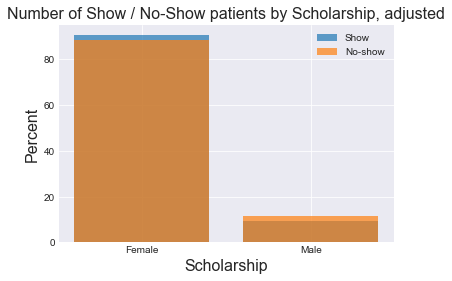

In [28]:
fonts = 16
alphas = .7
title = 'Number of Show / No-Show patients by Scholarship, adjusted'
x_axis = 'Scholarship'
y_axis = 'Percent'
bar_lable = ['Female', 'Male']
group = 'No-show'
counter = 'PatientId'
group1 = 'No'
group2 = 'Yes'
label1 = 'Show'
label2 = 'No-show'

viz(title, fonts, x_axis, y_axis, bar_lable, group, counter, group1, group2, label1, label2)

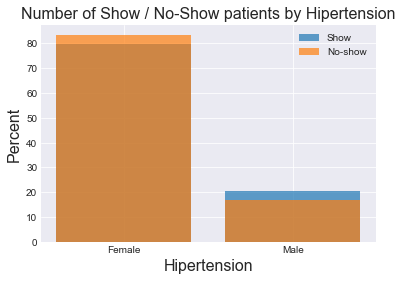

In [29]:
fonts = 16
alphas = .7
title = 'Number of Show / No-Show patients by Hipertension'
x_axis = 'Hipertension'
y_axis = 'Percent'
bar_lable = ['Female', 'Male']
group = 'No-show'
counter = 'PatientId'
group1 = 'No'
group2 = 'Yes'
label1 = 'Show'
label2 = 'No-show'

viz(title, fonts, x_axis, y_axis, bar_lable, group, counter, group1, group2, label1, label2)

**Result**: Higher no-show results for female with hipertension and lower no-show figures for man versus show.

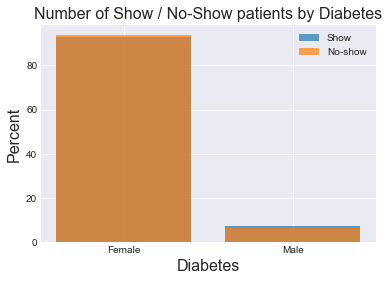

In [30]:
fonts = 16
alphas = .7
title = 'Number of Show / No-Show patients by Diabetes'
x_axis = 'Diabetes'
y_axis = 'Percent'
bar_lable = ['Female', 'Male']
group = 'No-show'
counter = 'PatientId'
group1 = 'No'
group2 = 'Yes'
label1 = 'Show'
label2 = 'No-show'

viz(title, fonts, x_axis, y_axis, bar_lable, group, counter, group1, group2, label1, label2)

**Result**: No big difference in show / no-show appointmens for female/male for Diabetis.

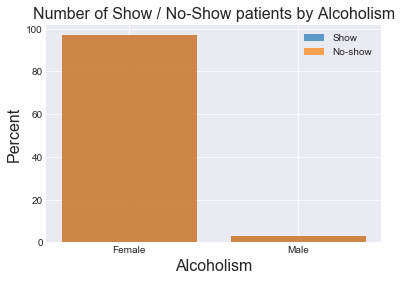

In [31]:
fonts = 16
alphas = .7
title = 'Number of Show / No-Show patients by Alcoholism'
x_axis = 'Alcoholism'
y_axis = 'Percent'
bar_lable = ['Female', 'Male']
group = 'No-show'
counter = 'PatientId'
group1 = 'No'
group2 = 'Yes'
label1 = 'Show'
label2 = 'No-show'

viz(title, fonts, x_axis, y_axis, bar_lable, group, counter, group1, group2, label1, label2)

**Result**: No difference in show / no-show appointmens for female/male.

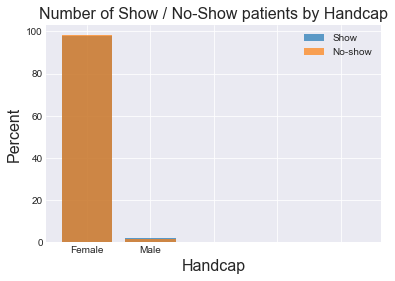

In [147]:
variable = 'Handcap'
no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No'] * 100
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes'] * 100

ind = np.arange(len(show_prop))

show_bar = plt.bar(ind, show_prop, label='Show', alpha = .7)
no_show_bar = plt.bar(ind, no_show_prop, label='No-show', alpha = .7)

plt.title('Number of Show / No-Show patients by Handcap', fontsize = 16)
plt.xlabel(variable, fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
locations = ind
labels = ['Female', 'Male']
plt.xticks(locations, labels)
plt.legend();

**Result**: No big difference in show / no-show appointmens for female/male by handicap.

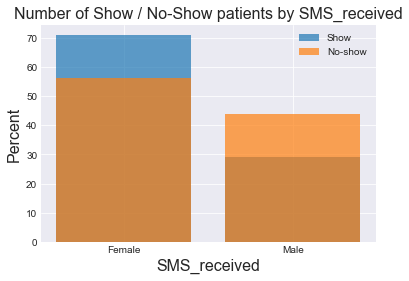

In [148]:
variable = 'SMS_received'
no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No'] * 100
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes'] * 100

ind = np.arange(len(show_prop))

show_bar = plt.bar(ind, show_prop, label='Show', alpha = .7)
no_show_bar = plt.bar(ind, no_show_prop, label='No-show', alpha = .7)

plt.title('Number of Show / No-Show patients by SMS_received', fontsize = 16)
plt.xlabel(variable, fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
locations = ind
labels = ['Female', 'Male']
plt.xticks(locations, labels)
plt.legend();

**Result**: **Significant deviation of no-show**, if a pacient received a SMS or not. Male have a significant higher rate of no-show and female have a significant lower no-show rate if received a SMS.

In [149]:
df_base.groupby('Neighbourhood')['No-show'].value_counts().head()

Neighbourhood    No-show
AEROPORTO        No            7
                 Yes           1
ANDORINHAS       No         1741
                 Yes         521
ANTÔNIO HONÓRIO  No          221
Name: No-show, dtype: int64

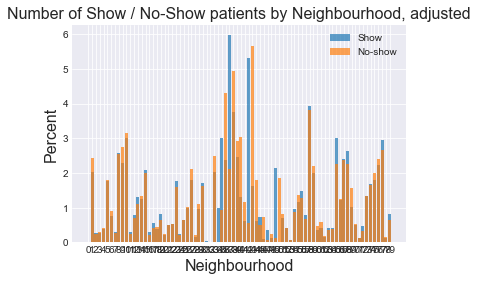

In [212]:
variable = 'Neighbourhood'

no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No'] * 100
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes'] * 100

ind = np.arange(len(show_prop))

show_bar = plt.bar(ind, show_prop, label='Show', alpha = .7)
no_show_bar = plt.bar(ind, no_show_prop, label='No-show', alpha = .7)

plt.title('Number of Show / No-Show patients by Neighbourhood, adjusted', fontsize = 16)
plt.xlabel(variable, fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
locations = ind
plt.xticks(locations)
plt.legend();

Filter for the top 0.05% neighbourhoods on delta of show to no-show:

In [151]:
variable = 'Neighbourhood'

no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No']
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes']

delta = abs(show_prop - no_show_prop) > 0.005
delta_n = delta[delta > 0.05].index
#delta_neighourhood = delta[delta == True]
#delta_neighourhood

In [152]:
variable = 'Neighbourhood'

no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No']
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes']

delta = abs(show_prop - no_show_prop) > 0.005

delta_neighourhood = delta[delta == True]
delta_neighourhood

Neighbourhood
ITARARÉ              True
JARDIM CAMBURI       True
JARDIM DA PENHA      True
JESUS DE NAZARETH    True
SANTA MARTHA         True
SANTOS DUMONT        True
Name: PatientId, dtype: bool

**Result**: 6 neighbourhoods with a absolute deviation +/- 0.5% of show to no-show appointments.

Calculate the waiting time between scheduling and appointment:

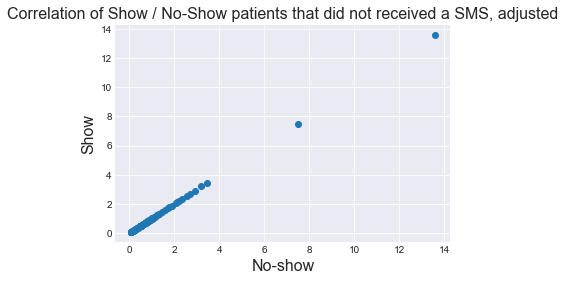

In [230]:
plt.scatter(no_show_sms_prop, no_show_no_sms_prop)

plt.title('Correlation of Show / No-Show patients that did not received a SMS, adjusted', fontsize = 16)
plt.xlabel('No-show', fontsize = 16)
plt.ylabel('Show', fontsize = 16);

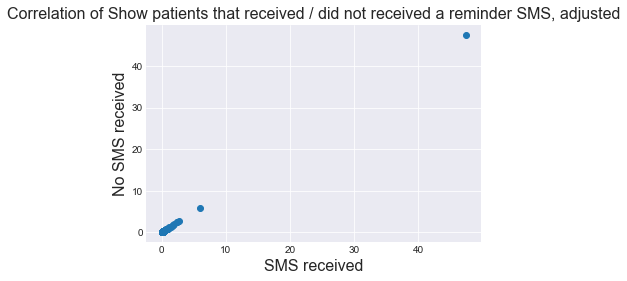

In [237]:
plt.scatter(show_sms_prop, show_no_sms_prop)

plt.title('Correlation of Show patients that received / did not received a reminder SMS, adjusted', fontsize = 16)
plt.xlabel('SMS received', fontsize = 16)
plt.ylabel('No SMS received', fontsize = 16);

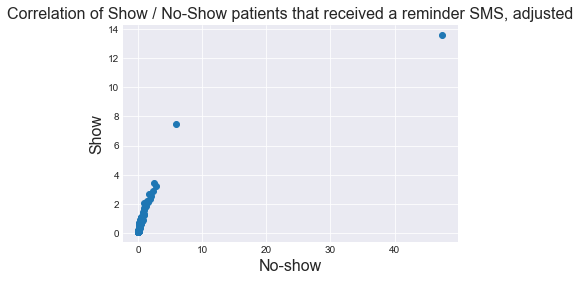

In [229]:
plt.scatter(show_sms_prop, no_show_sms_prop)

plt.title('Correlation of Show / No-Show patients that received a reminder SMS, adjusted', fontsize = 16)
plt.xlabel('No-show', fontsize = 16)
plt.ylabel('Show', fontsize = 16);

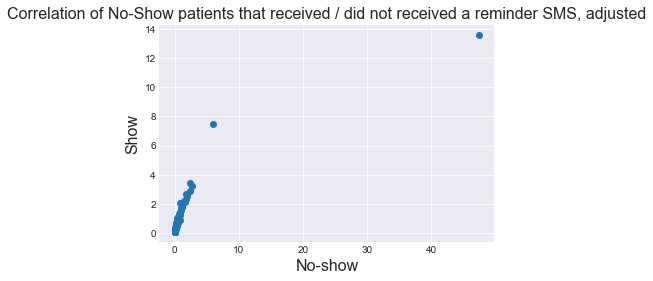

In [236]:
plt.scatter(show_no_sms_prop, no_show_no_sms_prop)

plt.title('Correlation of No-Show patients that received / did not received a reminder SMS, adjusted', fontsize = 16)
plt.xlabel('No-show', fontsize = 16)
plt.ylabel('Show', fontsize = 16);

**Result**: There is a correlation of No-show / Show patients that (did not) receive a reminder SMS. It is visible that the SMS has a positive effect on show patients.

### Research Question 2 : What impact on showing up to a doctors appointment has the waiting time?

Create additional column for waiting time:

In [154]:
df_base['waiting_time'] = abs(df_base['AppointmentDay'] - df_base['ScheduledDay']).dt.days

In [155]:
df_base.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Show histogram on waiting time:

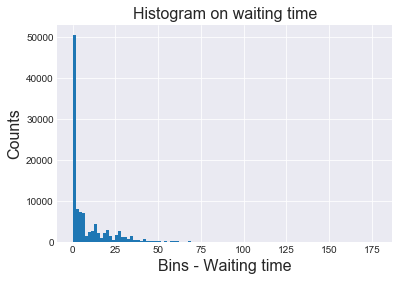

In [156]:
x = df_base['waiting_time']
bins = 100
plt.hist(x, bins);

plt.xlabel('Bins - Waiting time', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.title('Histogram on waiting time', fontsize = 16);

In [157]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
waiting_time      110526 non-null int64
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 12.6+ MB


**Result**: Delete outliers of waiting time (Waiting time > 50 days)

Delete outliers:

In [160]:
no_wait = (df_base[df_base['waiting_time'] > 50] == True).index
no_wait

Int64Index([   285,    476,    696,    698,    702,    703,    712,    713,
               714,    715,
            ...
            110331, 110335, 110337, 110350, 110351, 110352, 110396, 110397,
            110417, 110420],
           dtype='int64', length=3037)

In [161]:
df_base.drop(no_wait, axis = 0, inplace = True)

Check deletion:

In [162]:
sum(df_base['waiting_time'] > 50)

0

In [163]:
df_base.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,waiting_time
count,1.074890e+05,107489.000000,107489.000000,107489.000000,107489.000000,107489.000000,107489.000000,107489.000000,107489.000000
mean,1.474588e+14,36.824745,0.099815,0.196867,0.071886,0.030989,0.022309,0.312097,7.874685
std,2.560733e+14,23.025567,0.299754,0.397633,0.258301,0.173289,0.161816,0.463351,11.044002
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176934e+12,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.433715e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,50.000000


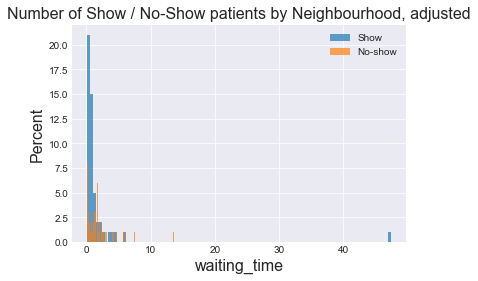

In [164]:
variable = 'waiting_time'
bins = 100
no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No'] * 100
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes'] * 100

ind = np.arange(len(show_prop))

show_bar = plt.hist(show_prop, bins, label='Show', alpha = .7)
no_show_bar = plt.hist(no_show_prop, bins, label='No-show', alpha = .7)

plt.title('Number of Show / No-Show patients by Neighbourhood, adjusted', fontsize = 16)
plt.xlabel(variable, fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
plt.legend();

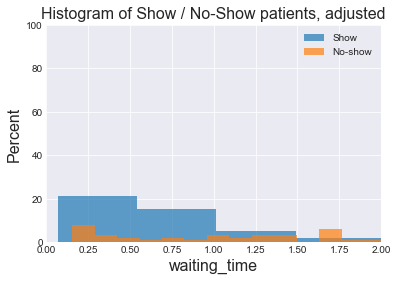

In [168]:
variable = 'waiting_time'
bins = 100
no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No'] * 100
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes'] * 100

ind = np.arange(len(show_prop))

show_bar = plt.hist(show_prop, bins, label='Show', alpha = .7)
no_show_bar = plt.hist(no_show_prop, bins, label='No-show', alpha = .7)

plt.title('Histogram of Show / No-Show patients, adjusted', fontsize = 16)
plt.xlabel(variable, fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
plt.legend()
plt.axis([0, 2, 0, 100]);

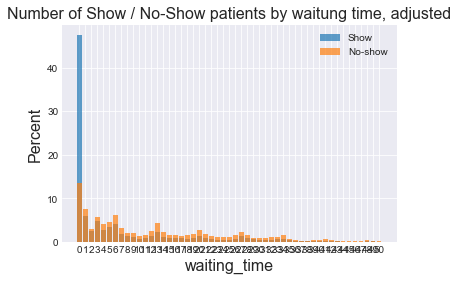

In [176]:
variable = 'waiting_time'

no_show_counts = df_base.groupby(['No-show', variable]).count()['PatientId']
no_show_totals = df_base.groupby('No-show').count()['PatientId']

show_prop = no_show_counts['No'] / no_show_totals['No'] * 100
no_show_prop = no_show_counts['Yes'] / no_show_totals['Yes'] * 100

ind = np.arange(len(show_prop))

show_bar = plt.bar(ind, show_prop, label='Show', alpha = .7)
no_show_bar = plt.bar(ind, no_show_prop, label='No-show', alpha = .7)

plt.title('Number of Show / No-Show patients by waitung time, adjusted', fontsize = 16)
plt.xlabel(variable, fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
locations = ind
plt.xticks(locations)
plt.legend();

**Result**: Siginifcantly more people show up to the appointment, if booked on the same day. If booked >= 1 day ahead more people dont show up to the appointment.

In [174]:
df_combi = df_base.groupby(['No-show', 'SMS_received', 'waiting_time']).count()['PatientId']
df_combi.head()

No-show  SMS_received  waiting_time
No       0             0               40870
                       1                5123
                       2                1380
                       3                1691
                       4                 856
Name: PatientId, dtype: int64

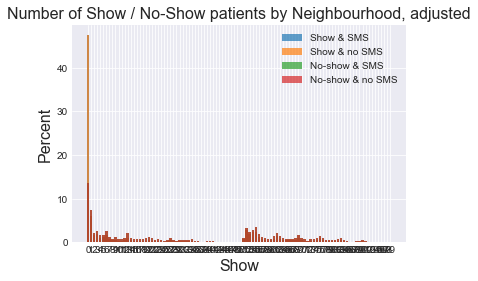

In [219]:
no_show_sms_counts = df_base.groupby(['No-show', 'SMS_received', 'waiting_time']).count()['PatientId']
no_show_sms_totals = df_base.groupby(['No-show', 'SMS_received']).count()['PatientId']

show_sms_prop = no_show_sms_counts['No'] / no_show_totals['No'] * 100
show_no_sms_prop = no_show_sms_counts['No'] / no_show_totals['No'] * 100
no_show_sms_prop = no_show_sms_counts['Yes'] / no_show_totals['Yes'] * 100
no_show_no_sms_prop = no_show_sms_counts['Yes'] / no_show_totals['Yes'] * 100

ind = np.arange(len(show_sms_prop))

show_sms_bar = plt.bar(ind, show_sms_prop, label='Show & SMS', alpha = .7)
show_no_sms_bar = plt.bar(ind, show_no_sms_prop, label='Show & no SMS', alpha = .7)
no_show_sms_bar = plt.bar(ind, no_show_sms_prop, label='No-show & SMS', alpha = .7)
no_show_no_sms_bar = plt.bar(ind, no_show_no_sms_prop, label='No-show & no SMS', alpha = .7)

plt.title('Number of Show / No-Show patients by Neighbourhood, adjusted', fontsize = 16)
plt.xlabel('Show', fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
locations = ind
plt.xticks(locations)
plt.legend();

Vizualization not finalized. Waiting for support of mentor.

<a id='conclusions'></a>
## Conclusions

**Data wrangling:**

> There have been no missing values. The AppointmentId have been deleted, since it didn't deliver furhter insights. Some data types have been converted for futher processing, eg. schedule data and appointment date. Also outlier data have been deleted, eg age < 0 years.

**Overview statistics:**

> Mean age: 37 years with a max age of 115. On average 9.8% of patients have a scholarship. On average 19.7% of patients have hipertension, 7.2% diabetis, 3.0% alcoholism and 2.2% handcap. On averate 32.1% of patients received a SMS.

**Research Question 1: Has the SMS reminder an impact on the patient to show up to a doctors appointment?**

> 20.2% of patients don't show up on appointments.
>
> The following results have been adjusted on the base of show / no-show results to have comparable data for a conclusion available.
>
> No siginificant deviation of show / no-show to a doctor's appointment by gender, by Diabetis and gender, by scholarship and gender, by handicap and gender.
>
> A slight deviation of of show / no-show to a doctor's appointment by hipertension and gender visible.
>
> At 6 neighbourhoods a deviation of +/- 0.5% of show to no-show appointments have been visible.
>
> Significant deviation of no-show patients, if a pacient received a SMS or not. Male patients have a significant higher rate of no-show and female have a significant lower no-show rate if they received a SMS.
>
> Finally a positive correlation of No-show / Show patients that (did not) receive a reminder SMS is visible.
>
> **Conclusion: SMS have a positive effect on the show up of a patient to a doctor's appointment.**

**Research Question 2 : What impact on showing up to a doctors appointment has the waiting time?**

> For this question the waiting time has been calculated (delta of date of scheduling an appointment to the appointment itselfe). Based on the data outliers of days waiting time (>50 days) have been deleted.
>
> The number of appointments booked on the same day of the doctor's visit is very high compared. Based on that the number of show patients is significantly higher as the no-show patients. For appointments scheduled with a waiting time of > 1 day it is visible that the no-show rate is slightly higher as the show rate.
>
> **Conclusion: Waiting time has a significant impact on the show up of a patient to a doctor's appointment, especially if the appointment is on the same day.**


**Limitations:**

> The code had one entry where the age was below 0 years.
>
> The code had data where the waiting time was above 50 days that for me indicate outliers that have been deleted.
>
> Only descriptive statistics was used.
>
> Most data are categorical values.

**Overall result:**

> **SMS and a short waiting time seem to have a positive impact on the show up of a patient to a doctor's appointment in Brazil.**